In [1]:
%pylab qt
import scipy.integrate as integrate
from IPython import display

Populating the interactive namespace from numpy and matplotlib


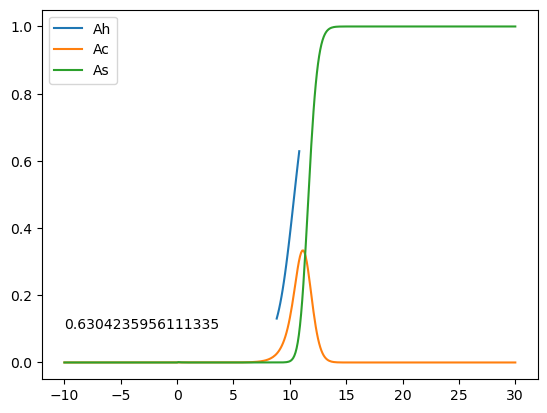

In [2]:
#Euler numerical method (no curviture)

# define domain and lattice
dx = 0.1
dt = 0.001
tf = 400.0
t_max = int(tf/dt)
Lmax = 30.0 
Lmin = -10.0
Nx = int((Lmax-Lmin)/dx) +1
xs = linspace(Lmin, Lmax, Nx)



a0 = 1.0
nu = 0.9
h0 = 2.0

hubRad = 1.0
NHub = int((2.0*hubRad)/dx)  # number of lattice sites that spike proteins can occupy


        

# initialize As and Ac for each run through
As = zeros(Nx)
As[xs > 0.0] = a0*1.0
Ac = zeros(Nx)
AHub0 = h0 * ones(NHub)
AHub = AHub0
xp = 0.0


v_t = []
for t in range(t_max):
    
    leftBdry = xp - hubRad    # left and right boundary for spike protein distribution
    rightBdry = xp + hubRad
    xHub = linspace(leftBdry, rightBdry, NHub)
    
    diffMat = abs(xHub[:,newaxis] - xs)
    expMat = exp(-0.5*diffMat**2)  # NHub by N matrix
    
    PNum = expMat*AHub[:,newaxis]
    
    Pxx = PNum/sum(PNum, axis = 0)  # probability that a given substrate protein binds with hub protein (columns normalized)
    
    #total_f = trapz(trapz(Pxx*diffMat, x = xHub,axis = 0)*Ac, x=xs)
    centerNum = trapz(AHub0-AHub,x=xHub)
    if centerNum < 1e-8:
        AHubCenter = xp
    else:
        AHubCenter = trapz((AHub0-AHub)*xHub,x=xHub)/centerNum
    total_f = -trapz((AHubCenter-xs)*Ac,x=xs)
    binding = trapz(expMat*outer(AHub,As), x=xHub, axis = 0)     
    burnt = nu * Ac
    Ac += (binding - burnt) * dt
    As += - binding * dt
    AHub =  AHub0 - sum(Ac*Pxx, axis = 1) 
    xp += total_f * dt 
    v_t.append(total_f)
    if t % 1000 == 0:
        display.clear_output(wait=True)
        plot(xHub, AHub0-AHub, label = 'Ah')
        plot(xs,Ac, label = 'Ac')
        plot(xs,As, label = 'As')
        #axvline(x=xp, color = "red")
        #axvline(x=AHubCenter, color = "green")
        text(-10,0.1,total_f)
        legend()
        display.display(gcf())
        cla()
        
        #input("Press enter to continue")
    if xp >= 10.0:
        break

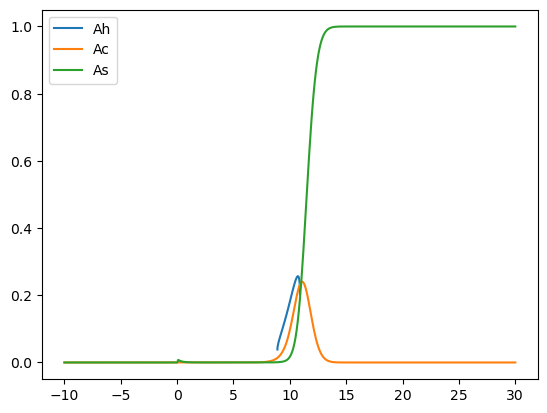

In [3]:
#Euler method with curviture

# define domain and lattice
dx = 0.1
dt = 0.001
tf = 400.0
t_max = int(tf/dt)
Lmax = 30.0 
Lmin = -10.0
Nx = int((Lmax-Lmin)/dx) +1
xs = linspace(Lmin, Lmax, Nx)



a0 = 1.0
nu = 0.9
h0 = 1.0

hubRad = 1.0
phiCrit = pi * 0.5 # substrate can bind anything in [-phiCrit, phiCrit]
NHub = int((2.0*phiCrit*hubRad)/dx)  # number of lattice sites that spike proteins can occupy
phis = linspace(-phiCrit,phiCrit,NHub)

def xHubCurv(xp):
    return xp + hubRad * sin(phis)
        

# initialize As and Ac for each run through
As = zeros(Nx)
As[xs > 0.0] = a0*1.0
Ac = zeros(Nx)
AHub0 = h0 * ones(NHub)
AHub = AHub0
xp = 0.0


v_t = []
for t in range(t_max):
    
    leftBdry = xp - hubRad    # left and right boundary for spike protein distribution
    rightBdry = xp + hubRad
    xHub = xHubCurv(xp)
    
    diffMat = abs(xHub[:,newaxis] - xs)
    stretchMat = sqrt((xp + hubRad*sin(phis[:,newaxis]) - xs)**2 + hubRad**2*(1-cos(phis[:,newaxis]))**2 )
    expMat = exp(-0.5*stretchMat**2)  # NHub by N matrix
    
    
    
    PNum = expMat*AHub[:,newaxis]
    
    Pxx = PNum/sum(PNum, axis = 0)  # probability that a given substrate protein binds with hub protein (columns normalized)
    
    # find the center of mass for the hub protein distribution
    centerNum = trapz(AHub0-AHub,x=xHub)
    if centerNum < 1e-8:# was an issue when centerNum was zero
        AHubCenter = xp
    else:
        AHubCenter = trapz((AHub0-AHub)*xHub,x=xHub)/centerNum
    
    total_f = -trapz((AHubCenter-xs)*Ac,x=xs)
    binding = trapz(expMat*outer(AHub,As), x=xHub, axis = 0)     
    burnt = nu * Ac
    Ac += (binding - burnt) * dt
    As += - binding * dt
    AHub =  AHub0 - sum(Ac*Pxx, axis = 1) 
    xp += total_f * dt 
    v_t.append(total_f)
    if t % 1000 == 0:
        display.clear_output(wait=True)
        plot(xHub, AHub0-AHub, label = 'Ah')
        plot(xs,Ac, label = 'Ac')
        plot(xs,As, label = 'As')
        #axvline(x=xp, color = "red")
        #axvline(x=AHubCenter, color = "green")
        #text(-10,0.1,total_f)
        legend()
        display.display(gcf())
        cla()
        
        #input("Press enter to continue")
    if xp >= 10.0:
        plot(xHub, AHub0-AHub, label = 'Ah')
        plot(xs,Ac, label = 'Ac')
        plot(xs,As, label = 'As')
        legend()
        break

In [5]:
plot(xHub, AHub0-AHub, label = 'Ah')